For each of the following questions, formulate a null and alternative hypothesis (be as specific as you can be), 

then give an example of what a true positive, true negative, type I and type II errors would look like. 

Note that some of the questions are intentionally phrased in a vague way. 

It is your job to reword these as more precise questions that could be tested.



##### Has the network latency gone up since we switched internet service providers?

null hypothisis - network latency has remained the same since the switch 
alternative hypotisis - new internet service provider is faster 

true positive (Null is false and we reject the null)

    - conclude the network is faster 

    - the network was always going to be faster  

true nagative (Null is true and we accept it)

    - conclude there is no change in the network 

    - we thought there would be no chnage  (Null is true and we accept it)

type 1 error (Null is true and we reject the null)

    - conclude the network is the same  
    
    - thought the network speed would be faster  

type 2 error (Null is false and we acept the null)
    
    - conclude the network remained the same 
    
    - always thought the network would stay the same  

##### Is the website redesign any good?

null hypothisis - the website redesine is not good 

alternative hypothisis - the webside redesine is great

True positive (Null is false and we reject the null)
    
    - website redsign is great 
    
    - website redesign was always going to be great 

true nagative (Null is true and we accept it)
    
    - websight redesign is not good 
    
    - we always knew the website redesign was not going to be good  

type 1 error (Null is true and we reject the null)
    
    - websight redesign is not good 
    
    - website redesign was suposed to be great 

type 2 error (Null is false and we acept the null)
    
    - websight redesign is great 
    
    - thought websight redesign was going to be bad



##### Is our television ad driving more sales?


null hypothisis - tv ad is not driving sales

alternative hypothisis - our tv ad is driving 4x the sales

True positive (Null is false and we reject the null)
    
    - ad is driving sales
    
    - always knew it would drive sales 

true nagative (Null is true and we accept it)
    
    - ad is not driving sales
    
    - we always knew the ad would not drive sales 

type 1 error (Null is true and we reject the null)
    
    - ad is not driving sales 
    
    - thought the ad would drive sales 

type 2 error (Null is false and we acept the null)
    
    - ad is driving sales 
    
    - thought the ad would not drive sales 

# Question 1 

### Answer with the type of stats test you would use (assume normal distribution):



Is there a relationship between the length of your arm and the length of your foot?

    - persons test or spearmans test beacuse they are two continues variables 


Does smoking affect when or not someone has lung cancer?
    
    - chia squared we are asking if there is a corrolation or not 


Is gender independent of a person’s blood type?

    - chia squared we are asking if there is a corrolation or not 


Does whether or not a person has a cat or dog affect whether they live in an apartment?
   
    - chia squared we are asking if there is a corrolation or not 



Does the length of time of the lecture correlate with a student's grade?
 
    - persons or spearmans test because two countinues variables



In [128]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
from pydataset import data
import seaborn as sns
import env


# Question 2

### Use the telco_churn data.

In [2]:
from env import user, host, password, host
def get_db_url(user, password, host, db):
    url = f'mysql+pymysql://{user}:{password}@{host}/{db}'
    return(url)

In [3]:
telco_churn = get_db_url(env.user, env.password, env.host, 'telco_churn')


### Does tenure correlate with monthly charges?

In [5]:
# filtered the dataframe in SQL so I do not have to do much filtering in python 

query1 = 'select tenure, monthly_charges from customers'
df = pd.read_sql(query1, telco_churn)
df.sample(5)


,tenure,monthly_charges
566,24,21.05
5008,69,104.00
4372,3,70.30
1908,24,39.10
6010,31,76.05


In [6]:
# tenure is a continous variable
# monthly_charges is a continues variable 

# persons test or spearmans test based on the variabls

# state your hypothisis 
    # there is no lener relationship between tenure and monthly charges 
    # there is a lener relationship between tenure and monthly charges 

# set your alpha 
    # 0.05 because we want to be 95 percent certen 
alpha = 0.05


In [7]:
# see what kind of Dtpes I am working with 

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   tenure           7043 non-null   int64  
 1   monthly_charges  7043 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 110.2 KB


<Axes: xlabel='tenure', ylabel='monthly_charges'>

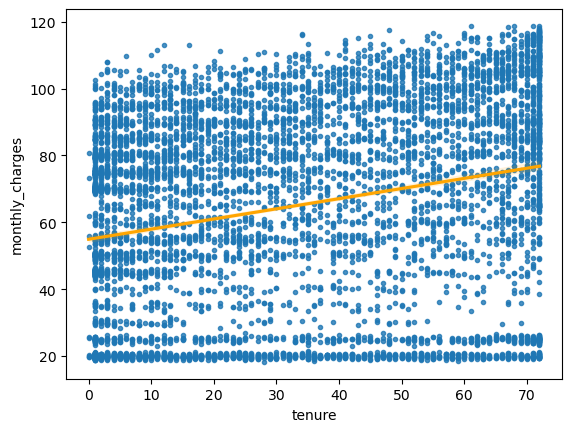

In [336]:
# Can plot and view the corralation between my two variables using a scaterplot 

sns.regplot(x='tenure', y='monthly_charges', data = df, marker='.', line_kws={'color' : 'orange'})


<Axes: >

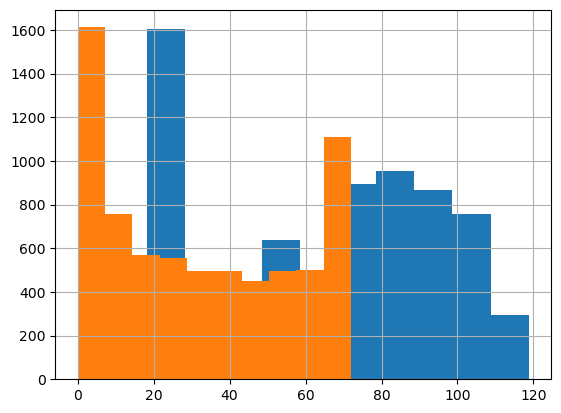

In [337]:
#visual test of distribution for monthly charges
df.monthly_charges.hist()

#visual test of distribution for tenure
df.tenure.hist()

In [8]:
#create a new function
def eval_dist(r, p, α=0.05):
    '''
    This function takes in r, p and alpha values
    then returns normal distribution print statement,
    if the p value is greater than alpha.
    Or not normal distribution print statement otherwise.
    '''
    if p > α:
        return print(f"""The data is normally distributed""")
    else:
        return print(f"""The data is NOT normally distributed""")

In [9]:
# You can use a Shapiro Test to confirm normalcy

r, p = stats.shapiro(df.monthly_charges)

r, p


/Users/ramirolopez/anaconda3/lib/python3.10/site-packages/scipy/stats/_morestats.py:1816: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


(0.9208889007568359, 0.0)

In [10]:
eval_dist(r,p)

The data is NOT normally distributed


In [11]:
#let's get the stats for tenure
r2, p2 = stats.shapiro(df.tenure)

#see those values
r2, p2

(0.9037512540817261, 0.0)

In [345]:
eval_dist(r2, p2)

The data is NOT normally distributed


In [12]:
#Since our features are not normally distributed, use Spearman
sr,sp = stats.spearmanr(df.tenure, df.monthly_charges)
sr,sp

(0.27641678933130215, 1.0271266876409408e-123)

In [13]:
def eval_Sresult(r, p, α=0.05):
    if p < α:
        return print(f"""Reject the null hypothesis. There is a linear correlation.
Spearman’s r: {r:2f}
P-value: {p}""")
    else:
        return print(f"""We fail to reject the null hypothesis that there is a linear correlation.
Spearman’s r: {r:2f}
P-value: {p}""")

In [14]:
eval_Sresult(sr,sp)

Reject the null hypothesis. There is a linear correlation.
Spearman’s r: 0.276417
P-value: 1.0271266876409408e-123


### Total charges?


In [18]:
query2 = 'select tenure, total_charges from customers'
df_t = pd.read_sql(query2, telco_churn)
df_t.sample(5)

,tenure,total_charges
735,69,1442.65
6937,6,463.05
2670,70,8152.3
3254,18,711.95
6893,7,147.5


In [19]:
# tenure is a continous variable 
# total_charges is a continous variable 

# either a persorns or spearmons test becasue there are both continous 

# Null there is no liner correlation between tenure and total charges 
# alt there is a liner correlation between tenure and total charges 

alpha = 0.05

In [20]:
df_t.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   tenure         7043 non-null   int64 
 1   total_charges  7043 non-null   object
dtypes: int64(1), object(1)
memory usage: 110.2+ KB


In [21]:
df_t.sort_values('total_charges')

,tenure,total_charges
2855,0,
3118,0,
3052,0,
5433,0,
1731,0,
...,...,...
5868,51,997.75
4298,55,998.1
4173,13,999.45
3162,12,999.8


In [23]:
# convert empty space into '0'
# change data type into float 

df_t['total_charges'] = df_t.total_charges.str.replace(' ', '0').astype(float)

In [24]:
# make sure the chages have been made 

df_t.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   tenure         7043 non-null   int64  
 1   total_charges  7043 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 110.2 KB


In [27]:
df_t.sample(3)

,tenure,total_charges
5065,61,6405.00
56,30,1888.45
442,18,1359.45


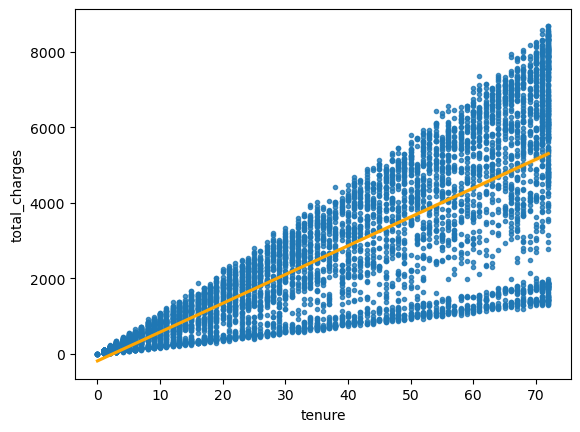

In [29]:
sns.regplot(x='tenure', y='total_charges', data=df_t, marker='.', line_kws={'color': 'orange'})
plt.show()

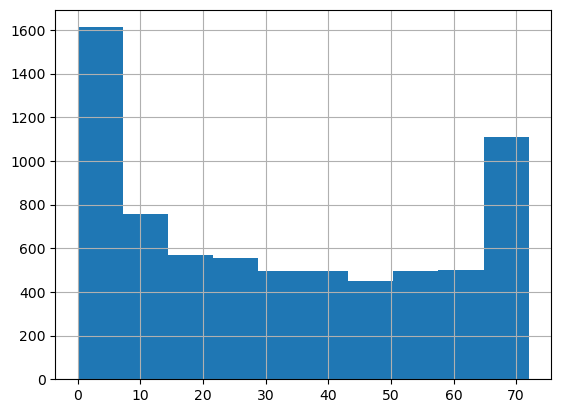

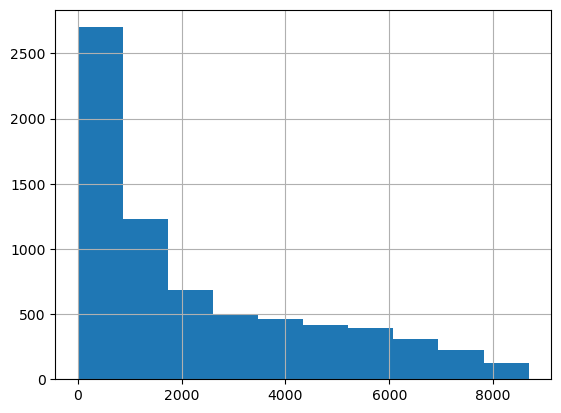

In [32]:
df_t.tenure.hist()
plt.show()

df_t.total_charges.hist()
plt.show()

In [33]:
# get R and P values by performing a shapiro and 
# also to see if total charges is normally distributed or not 

r, p = stats.shapiro(df_t.total_charges)
r, p

/Users/ramirolopez/anaconda3/lib/python3.10/site-packages/scipy/stats/_morestats.py:1816: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


(0.8601521253585815, 0.0)

In [34]:
# use the function we created 
eval_dist(r, p)

The data is NOT normally distributed


In [36]:
# confermed that both features are not normally distributed so we use a spearmans test
sr, sp = stats.spearmanr(df_t.tenure, df_t.total_charges)
sr, sp

(0.8896957900597577, 0.0)

In [37]:
# use the function we created 
eval_Sresult(sr, sp)

Reject the null hypothesis. There is a linear correlation.
Spearman’s r: 0.889696
P-value: 0.0


### What happens if you control for phone and internet service?


In [47]:
query3 = 'select * from customers'
df_p = pd.read_sql(query3, telco_churn)


In [41]:
# tenure is a continous variable 
# monthly_charges is a continous variable 

# will use persons or spearmons

# null there is no linear correlation between tenure and monthly_charges
# of phone and internet coustomers 

# alt there is a liner correlation between tenure and monthly_charges
# of phone and internet coustomers

alpha = 0.05

In [44]:
# create a dataframe of only custoners with phone service 
# and internet service type 1 
phone_df = df_p[(df_p.phone_service == 'Yes') & (df_p.internet_service_type_id == 1)][['monthly_charges', 'tenure']]

In [45]:
phone_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1739 entries, 0 to 7041
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   monthly_charges  1739 non-null   float64
 1   tenure           1739 non-null   int64  
dtypes: float64(1), int64(1)
memory usage: 40.8 KB


In [46]:
phone_df.sample(3)

,monthly_charges,tenure
1956,45.05,1
760,64.40,28
5221,65.60,37


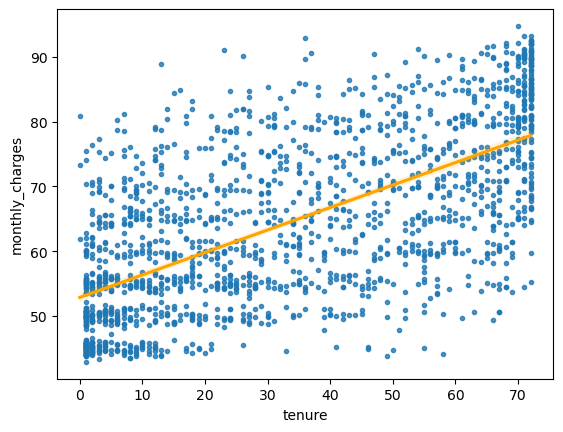

In [48]:
sns.regplot(x='tenure', y='monthly_charges', data=phone_df, marker='.', line_kws={'color': 'orange'})
plt.show()

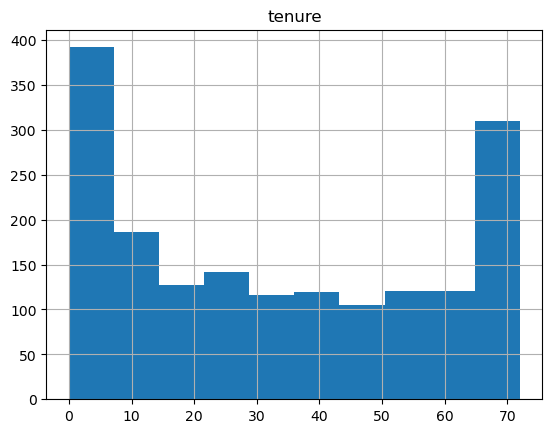

<function matplotlib.pyplot.show(close=None, block=None)>

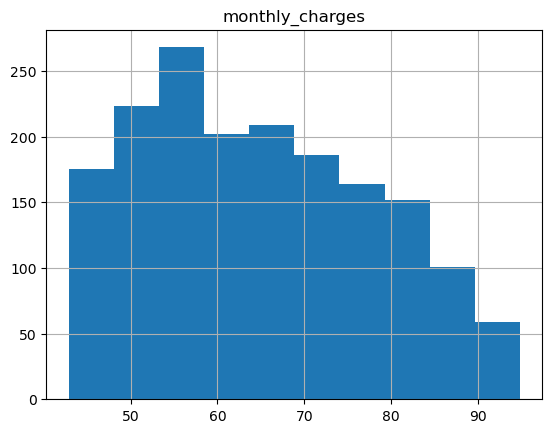

In [50]:
phone_df.tenure.hist()
plt.title('tenure')
plt.show()

phone_df.monthly_charges.hist()
plt.title('monthly_charges')
plt.show

In [ ]:
# note
# we can see that the data is not normally distributed 
# Let's run a Shapiro test on tenure and monthly charges to see 
# if it is normally dostributed or not 

In [51]:
r, p = stats.shapiro(phone_df.tenure)
r, p

(0.8991788029670715, 2.3523856297437335e-32)

In [52]:
eval_dist(r, p)

The data is NOT normally distributed


In [53]:
r, p = stats.shapiro(phone_df.monthly_charges)
r, p

(0.9584369659423828, 7.019588771857106e-22)

In [54]:
eval_dist(r, p)

The data is NOT normally distributed


In [55]:
# both are not normally distributed so we will use a spearmans test 

sr, sp = stats.spearmanr(phone_df.tenure, phone_df.monthly_charges)
sr, sp

(0.6644708508462759, 5.423601644635052e-222)

In [56]:
eval_Sresult(sr, sp)

Reject the null hypothesis. There is a linear correlation.
Spearman’s r: 0.664471
P-value: 5.423601644635052e-222


# Question 3

### Use the employees database.


In [61]:
employees = get_db_url(env.user, env.password, env.host, 'employees')

query4 = '''SELECT *
            FROM employees as e 
            JOIN salaries as s 
            ON e.emp_no = s.emp_no
            WHERE s.to_date = '9999-01-01';'''
df_e = pd.read_sql(query4, employees)
df_e.sample(1)


,emp_no,birth_date,first_name,last_name,gender,hire_date,emp_no,salary,from_date,to_date
22741,38313,1957-08-23,Seshu,Leaver,F,1986-09-10,38313,60493,2002-02-24,9999-01-01


In [62]:
df_e.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240124 entries, 0 to 240123
Data columns (total 10 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   emp_no      240124 non-null  int64 
 1   birth_date  240124 non-null  object
 2   first_name  240124 non-null  object
 3   last_name   240124 non-null  object
 4   gender      240124 non-null  object
 5   hire_date   240124 non-null  object
 6   emp_no      240124 non-null  int64 
 7   salary      240124 non-null  int64 
 8   from_date   240124 non-null  object
 9   to_date     240124 non-null  object
dtypes: int64(3), object(7)
memory usage: 18.3+ MB


### Is there a relationship between how long an employee has been with the company and their salary?


In [64]:
# Salary is continues 
# tenure is continues 

# use a spearmans or persons test 

# null there is no correlation beteen tenure and their current salary 

# alt there is a correlation beteen tenure and their current salary 

alpha = 0.05

In [67]:
# subtract to_date from hire_date to get tenure
df_e.to_date - df_e.hire_date

0         2926512 days, 0:00:00
1         2926729 days, 0:00:00
2         2926449 days, 0:00:00
3         2926354 days, 0:00:00
4         2925338 days, 0:00:00
                  ...          
240119    2924120 days, 0:00:00
240120    2924958 days, 0:00:00
240121    2926578 days, 0:00:00
240122    2923846 days, 0:00:00
240123    2922337 days, 0:00:00
Length: 240124, dtype: object

In [68]:
(df_e.to_date - df_e.hire_date).astype(str).str.split(' ', expand = True)

,0,1,2
0,2926512,"days,",0:00:00
1,2926729,"days,",0:00:00
2,2926449,"days,",0:00:00
3,2926354,"days,",0:00:00
4,2925338,"days,",0:00:00
...,...,...,...
240119,2924120,"days,",0:00:00
240120,2924958,"days,",0:00:00
240121,2926578,"days,",0:00:00
240122,2923846,"days,",0:00:00


In [70]:
# create a tenure column 
df_e['tenure'] = (df_e.to_date - df_e.hire_date).astype(str).str.split(' ', expand = True)[0]

In [72]:
df_e.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240124 entries, 0 to 240123
Data columns (total 11 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   emp_no      240124 non-null  int64 
 1   birth_date  240124 non-null  object
 2   first_name  240124 non-null  object
 3   last_name   240124 non-null  object
 4   gender      240124 non-null  object
 5   hire_date   240124 non-null  object
 6   emp_no      240124 non-null  int64 
 7   salary      240124 non-null  int64 
 8   from_date   240124 non-null  object
 9   to_date     240124 non-null  object
 10  tenure      240124 non-null  object
dtypes: int64(3), object(8)
memory usage: 20.2+ MB


In [73]:
# turn tenure column into an int by redefining it 
df_e.tenure = df_e.tenure.astype(int)

In [74]:
df_e.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240124 entries, 0 to 240123
Data columns (total 11 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   emp_no      240124 non-null  int64 
 1   birth_date  240124 non-null  object
 2   first_name  240124 non-null  object
 3   last_name   240124 non-null  object
 4   gender      240124 non-null  object
 5   hire_date   240124 non-null  object
 6   emp_no      240124 non-null  int64 
 7   salary      240124 non-null  int64 
 8   from_date   240124 non-null  object
 9   to_date     240124 non-null  object
 10  tenure      240124 non-null  int64 
dtypes: int64(4), object(7)
memory usage: 20.2+ MB


In [75]:
# create a dataframe with the info we want 
tenure_df = df_e[['tenure', 'salary']]

In [76]:
tenure_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240124 entries, 0 to 240123
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype
---  ------  --------------   -----
 0   tenure  240124 non-null  int64
 1   salary  240124 non-null  int64
dtypes: int64(2)
memory usage: 3.7 MB


In [77]:
tenure_df.sample(3)

,tenure,salary
99805,2925595,108311
85597,2924834,57744
230229,2926594,58779


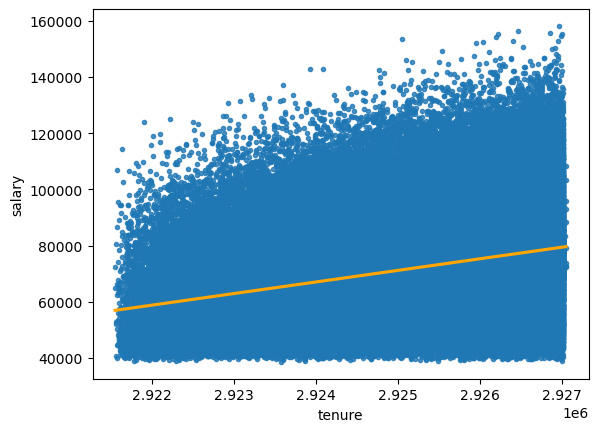

In [78]:
sns.regplot(x='tenure', y='salary', data=tenure_df, marker='.', line_kws={'color': 'orange'})
plt.show()

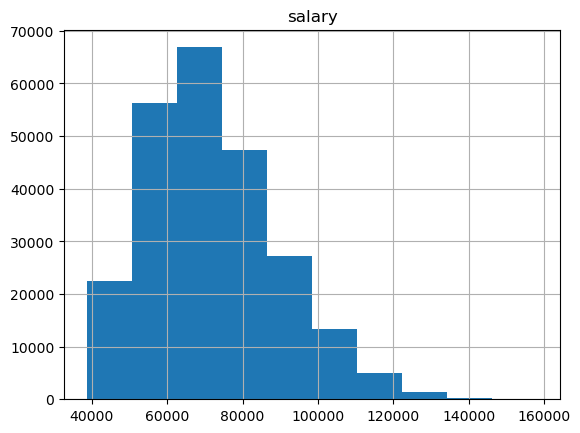

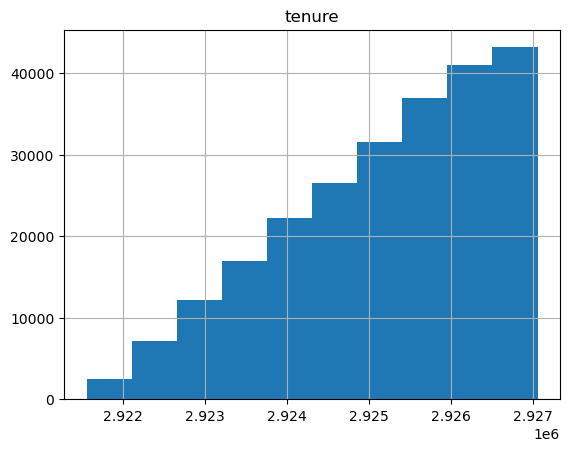

In [79]:
tenure_df.salary.hist()
plt.title('salary')
plt.show()

tenure_df.tenure.hist()
plt.title('tenure')
plt.show()

In [80]:
# use a shapiro test to see if the data is normally distributed or not 

r, p = stats.shapiro(tenure_df.tenure)
r, p

/Users/ramirolopez/anaconda3/lib/python3.10/site-packages/scipy/stats/_morestats.py:1816: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


(0.9476065635681152, 0.0)

In [81]:
# we can use are fuction we created 
eval_dist(r, p)

The data is NOT normally distributed


In [82]:
r, p = stats.shapiro(tenure_df.salary)
r, p

/Users/ramirolopez/anaconda3/lib/python3.10/site-packages/scipy/stats/_morestats.py:1816: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


(0.968895435333252, 0.0)

In [83]:
eval_dist(r, p)

The data is NOT normally distributed


In [84]:
# both are not normally istributed so we use a spearmans test 

sr, sp = stats.spearmanr(tenure_df.tenure, tenure_df.salary)
sr, sp

(0.3128783525010577, 0.0)

In [85]:
# use fuction created 
eval_Sresult(sr, sp)

Reject the null hypothesis. There is a linear correlation.
Spearman’s r: 0.312878
P-value: 0.0


### Is there a relationship between how long an employee has been with the company and the number of titles they have had?


In [88]:
# number of titles is descreate (1, 2, or 3)
# tenure is continues

# will use an ANOVA or Kruskal Wallis test 

# Null there is no correlation between tenure and number of titles
# Null there is a correlation between tenure and number of titles

alpha = 0.05

In [86]:
# we can use colums we have created above to create this query

query5 = '''
select t.emp_no, count(t.title) AS num_titles, te.tenure
from titles t
join (select emp_no, datediff(now(), min(from_date)) AS tenure 
from titles
group by emp_no
having max(to_date) = '9999-01-01') te 
on t.emp_no = te.emp_no
group by t.emp_no; 
'''
df_et = pd.read_sql(query5, employees)
df_et.sample(10)

,emp_no,num_titles,tenure
104077,229827,2,13614
221674,476840,1,9209
48969,71038,1,10346
52031,74865,2,10639
123424,254012,2,12879
47330,68986,2,13842
96377,220143,2,13042
21567,36856,2,11065
167749,409467,2,11049
67404,94074,1,9849


In [87]:
df_et.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240124 entries, 0 to 240123
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype
---  ------      --------------   -----
 0   emp_no      240124 non-null  int64
 1   num_titles  240124 non-null  int64
 2   tenure      240124 non-null  int64
dtypes: int64(3)
memory usage: 5.5 MB


In [90]:
# create the dataframe with only the number of titles and tenure 

df_tt = df_et[['num_titles', 'tenure']]

In [92]:
df_tt.sample(3), df_tt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240124 entries, 0 to 240123
Data columns (total 2 columns):
 #   Column      Non-Null Count   Dtype
---  ------      --------------   -----
 0   num_titles  240124 non-null  int64
 1   tenure      240124 non-null  int64
dtypes: int64(2)
memory usage: 3.7 MB


(        num_titles  tenure
 182911           1    9154
 189317           2   12226
 156464           2   12604,
 None)

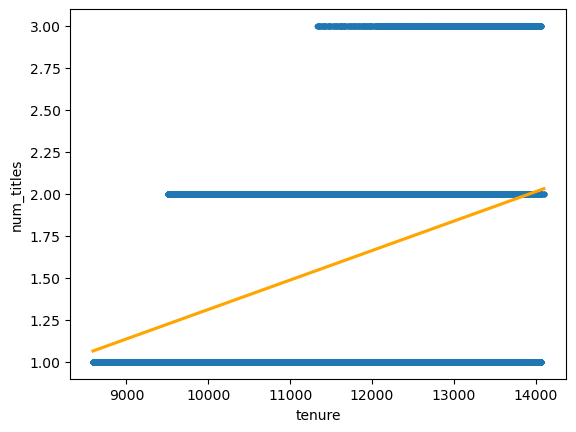

In [94]:
# visualize the data 

sns.regplot(x='tenure', y = 'num_titles', data=df_tt, marker='.', line_kws={'color': 'orange'})
plt.show()

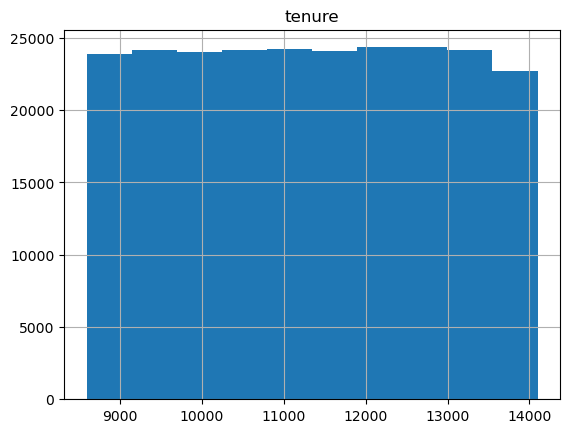

<function matplotlib.pyplot.show(close=None, block=None)>

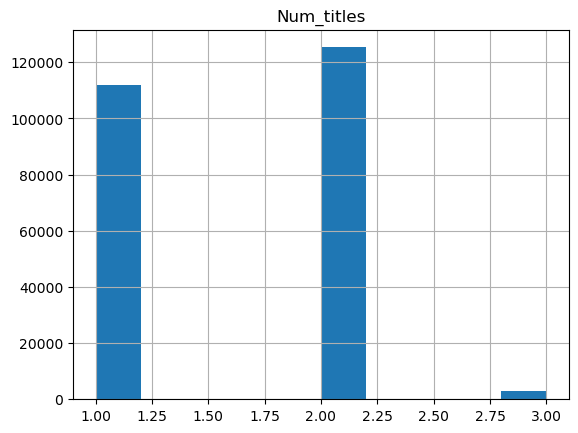

In [95]:
df_tt.tenure.hist()
plt.title('tenure')
plt.show()

df_tt.num_titles.hist()
plt.title('Num_titles')
plt.show

In [ ]:
# can see that they are not normally distributed 
# confirm with a shapiro test 
# have done the shapiro test on tenure before 

In [96]:
r, p = stats.shapiro(df_tt.num_titles)
r, p

/Users/ramirolopez/anaconda3/lib/python3.10/site-packages/scipy/stats/_morestats.py:1816: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


(0.6746425628662109, 0.0)

In [97]:
# use function created 
eval_dist(r, p)

The data is NOT normally distributed


In [ ]:
# both are not nornally distributed so we use  

In [ ]:
# Note: 
# Because the number of titles is a discrete value, 
# we should run an ANOVA or a Kruskal Wallis test 
# to test whether the average salary 
# of those with 1 title is different from those with 2, or 2 different from 3, etc

# Assumptions:
# - do we have equal variance? 
# - are there enough observations? 
# - are they independent of each other?

In [98]:
#are there enough observations? (more than __)
df_tt.num_titles.value_counts()

num_titles
2    125345
1    111892
3      2887
Name: count, dtype: int64

In [99]:
# Levene's Test: 
# Test the assumption of equal variance of spending score for the 2 groups.

In [100]:
# do we have equal variance?
stats.levene(df_tt.num_titles, df_tt.tenure)


LeveneResult(statistic=718602.1569097865, pvalue=0.0)

In [ ]:
# The variances are significantly different; 
# therefore we will use the Kruskal Wallis test.

# new null - the median is the same for the various number of titles
# new alt - the median is not equal for the various number of titles

In [101]:
stats.kruskal(df_tt.num_titles, df_tt.tenure)


KruskalResult(statistic=371488.64419334417, pvalue=0.0)

<Axes: title={'center': 'tenure'}, xlabel='num_titles'>

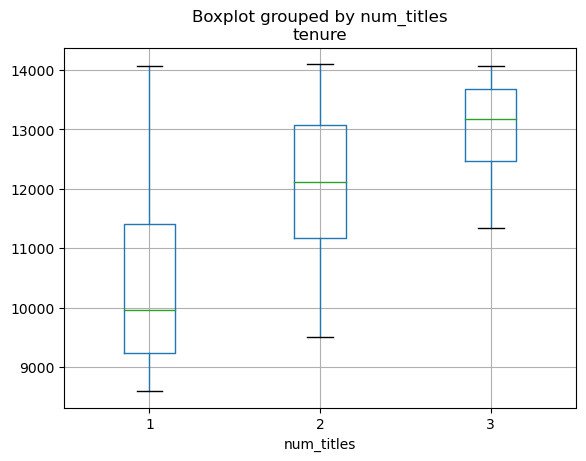

In [103]:
df_tt.boxplot('tenure', by='num_titles')


# Question 4

### Use the sleepstudy data.


In [106]:
sleep_study = data('sleepstudy')
sleep_study.sample(15)

,Reaction,Days,Subject
51,234.8606,0,332
16,215.9618,5,309
46,293.3187,5,331
122,300.0576,1,351
99,455.8643,8,337
175,287.1726,4,372
63,276.7693,2,333
112,243.4543,1,350
60,253.8644,9,332
13,202.9778,2,309


In [105]:
sleep_study.info()

<class 'pandas.core.frame.DataFrame'>
Index: 180 entries, 1 to 180
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Reaction  180 non-null    float64
 1   Days      180 non-null    int64  
 2   Subject   180 non-null    int64  
dtypes: float64(1), int64(2)
memory usage: 5.6 KB


In [107]:
sleep_study.Days.value_counts()

Days
0    18
1    18
2    18
3    18
4    18
5    18
6    18
7    18
8    18
9    18
Name: count, dtype: int64

### Is there a relationship between days and reaction time?


In [108]:
# days is continues 
# reaction time is continues 

# use a persons or spearmans test 

# null - there is no correlation between days and reation time 
# alt- there is a correlation between days and reaction time 

alpha = 0.05

In [110]:
# make dataframe with only info we need 
sleep_df = sleep_study[['Days', 'Reaction']]

In [112]:
sleep_df.info(), sleep_df.sample(4)

<class 'pandas.core.frame.DataFrame'>
Index: 180 entries, 1 to 180
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Days      180 non-null    int64  
 1   Reaction  180 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 4.2 KB


(None,
      Days  Reaction
 160     9  372.2288
 1       0  249.5600
 34      3  285.1330
 93      2  291.6112)

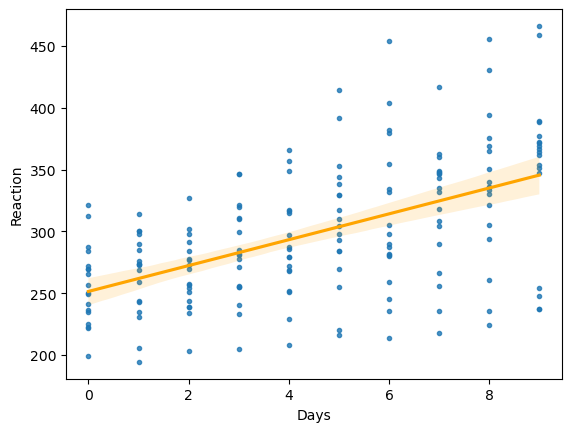

In [113]:
# Plot
sns.regplot(x='Days', y='Reaction', data=sleep_df, marker='.', line_kws={'color': 'orange'})
plt.show()

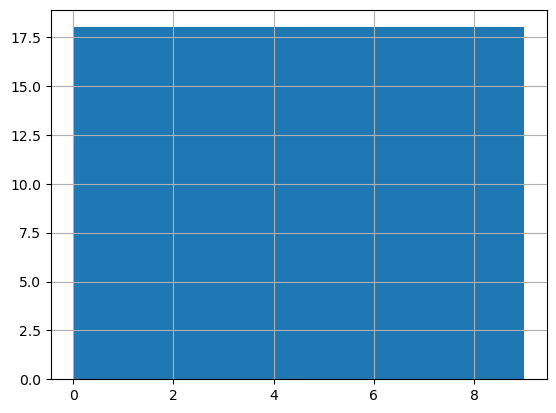

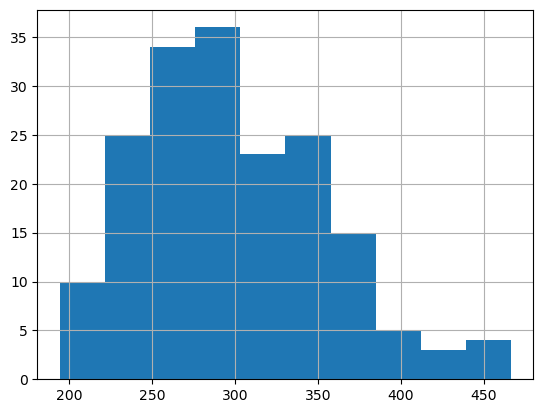

In [114]:
sleep_df.Days.hist()
plt.show()

sleep_df.Reaction.hist()
plt.show()

In [115]:
# can see that they are not normally distributed 
# confirm with shapiro test 

In [116]:
r, p = stats.shapiro(sleep_df.Days)
r, p

(0.9350039958953857, 3.023778560873325e-07)

In [117]:
eval_dist(r, p)

The data is NOT normally distributed


In [118]:
r, p = stats.shapiro(sleep_df.Reaction)
r, p

(0.970738410949707, 0.0007799151935614645)

In [119]:
eval_dist(r, p)

The data is NOT normally distributed


In [ ]:
# confirmed both are not normally distributed so we use a spearmans test 

In [120]:
sr, sp = stats.spearmanr(sleep_df.Days, sleep_df.Reaction)
sr, sp

(0.5228138502259547, 5.132878057706873e-14)

In [121]:
eval_Sresult(sr, sp)

Reject the null hypothesis. There is a linear correlation.
Spearman’s r: 0.522814
P-value: 5.132878057706873e-14


# Comparison of mean exersises 

In [ ]:
def eval_dist(r, p, α=0.05):
    '''
    This function takes in r, p and alpha values
    then returns normal distribution print statement,
    if the p value is greater than alpha.
    Or not normal distribution print statement otherwise.
    '''
    if p > α:
        return print(f"""The data is normally distributed""")
    else:
        return print(f"""The data is NOT normally distributed""")

# Question 1

### Answer with the type of test you would use (assume normal distribution):



### Is there a difference in grades of students on the second floor compared to grades of all students?
    - Grades of students on the second floor is a sample of the population 
    - Grades of all the students is the population 

    - Grades of students is a continuous variables

    - one sample 

    - two tailed because we are asking if they are different 
        and not specificly higher or lower 

    - One Sample T-test - comparing an observed mean to a thoretical one 


### Are adults who drink milk taller than adults who don't drink milk?

        - Variable is hight
        - drink milk vs not drink milk is the category we separate hight by 

        - hight is a continous variable across two categories

        - based on that we are doing a means test 

        - two samples

        - one tail because we are specificly asking who is taller 

        - Independant T-test (a.k.a. Two sample T-test) - comparing mean of group A to the mean of group B 


### Is the price of gas higher in Texas or in New Mexico?

        - variable is texas gas price 
        - category is texas or new mexico  

        - gas price is a continous variable

        - two samples

        - one tail because w are specificly asking whitch one is higher in price  
        
        - Independant T-test (a.k.a. Two sample T-test) - comparing mean of group A to the mean of group B 

### Are there differences in stress levels between students who take data science vs students who take web development vs students who take cloud academy?

        - Variable is stress (continous or discrete defpending on how it is measured)

        - categories:
        - ds student's stress is a sample 
        - wd student's stress is a sample 
        - ca student's stress if a sample 

        - ANOVA (analysis of variancs) - comparing the means of groups A, B, and C (more than 2)

# Question 2

### Ace Realty wants to determine whether the average time it takes to sell homes is different for its two offices. 


### A sample of 40 sales from office #1 revealed a mean of 90 days and a standard deviation of 15 days. 


### A sample of 50 sales from office #2 revealed a mean of 100 days and a standard deviation of 20 days. 


### Use a .05 level of significance.



In [ ]:
# is an independent 2 smapled T test 
# two tail because we are asking is there a difference 

# Form a null hypothisis and alternative hypothisis 

# - Null) office 1 sells homes at a faster rate
# - alternative) Both offices sell homes at the same rate 

In [122]:
# generate arrays for both offices 

office_1 = np.random.normal(90, 15, size =(40))
office_2 = np.random.normal(100, 20, size =(50))

In [123]:
# or 

office_1 = stats.norm(90, 15).rvs(40)
office_2 = stats.norm(100, 20).rvs(50)

In [130]:
# can do some exploration 

t_stat, p = stats.ttest_ind_from_stats(90, 15, 40, 100, 20, 50)

t_stat, p

(-2.6252287036468456, 0.01020985244923939)

In [132]:
def test_hypothesis(p, 
                    stat, 
                    tails='two', 
                    direction='greater',
                    α=0.05):
    '''
    test_hypothesis will take in a p value and a test statistic
    if p is less than a presumed alpha, then we  will reject
    our null hypothesis
    
    this takes in two positional arguments,
    p stat, a float value representing the probability of serendipity
    stat, a float value representing the test statistic
    
    with the keyword arguments f tails, direction, and alpha,
    the operator is able to change the control structrure in order
    to perform a one-tailed ttest if so desired
    '''
    if tails == 'two':
        if p < α:
            print(f'We can reject our null hypothesis!.\n Our p-value is {p} \n Our statistic value is {stat}')
        else:
            print(f'We fail to reject the null hypothesis :(.\n Our p-value is {p}.\n Our statistic is {stat}')
    else:
        if direction == 'greater':
            if ((p/2) < α) and (stat > 0):
                print(f'We can reject our null hypothesis!.\n Our p-value is {p} \n Our statistic value is {stat}')
            else:
                print(f'We fail to reject the null hypothesis :(.\n Our p-value is {p}.\n Our statistic is {stat}')
        else:
            if ((p/2) < α) and (stat < 0):
                print(f'We can reject our null hypothesis!.\n Our p-value is {p} \n Our statistic value is {stat}')
            else:
                print(f'We fail to reject the null hypothesis :(.\n Our p-value is {p}.\n Our statistic is {stat}')

In [133]:
test_hypothesis(p, t_stat)

We can reject our null hypothesis!.
 Our p-value is 0.01020985244923939 
 Our statistic value is -2.6252287036468456


# Question 3 

### Load the mpg dataset and use it to answer the following questions:


In [134]:
from pydataset import data
mpg = data('mpg')
mpg.info()

<class 'pandas.core.frame.DataFrame'>
Index: 234 entries, 1 to 234
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   manufacturer  234 non-null    object 
 1   model         234 non-null    object 
 2   displ         234 non-null    float64
 3   year          234 non-null    int64  
 4   cyl           234 non-null    int64  
 5   trans         234 non-null    object 
 6   drv           234 non-null    object 
 7   cty           234 non-null    int64  
 8   hwy           234 non-null    int64  
 9   fl            234 non-null    object 
 10  class         234 non-null    object 
dtypes: float64(1), int64(4), object(6)
memory usage: 21.9+ KB


In [135]:
mpg.sample(3)

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
131,land rover,range rover,4.0,1999,8,auto(l4),4,11,15,p,suv
10,audi,a4 quattro,2.0,2008,4,manual(m6),4,20,28,p,compact
211,volkswagen,gti,2.0,2008,4,auto(s6),f,22,29,p,compact



### Is there a difference in fuel-efficiency in cars from 2008 vs 1999?


In [ ]:
# NULL there is a differance in fuel-efficiency in cars from 2008 vs 1999
# there is not a difference in fuel-efficiency in cars from 2008 vs 1999

In [136]:
# created a new column for mean of cty and hwy

fuel_efficiency = mpg.hwy + mpg.cty / 2
mpg['fuel_efficiency'] = mpg.hwy + mpg.cty / 2
mpg

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,fuel_efficiency
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,38.0
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,39.5
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,41.0
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,40.5
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,34.0
...,...,...,...,...,...,...,...,...,...,...,...,...
230,volkswagen,passat,2.0,2008,4,auto(s6),f,19,28,p,midsize,37.5
231,volkswagen,passat,2.0,2008,4,manual(m6),f,21,29,p,midsize,39.5
232,volkswagen,passat,2.8,1999,6,auto(l5),f,16,26,p,midsize,34.0
233,volkswagen,passat,2.8,1999,6,manual(m5),f,18,26,p,midsize,35.0


In [ ]:
# same flow chart from before:
# what variables am I examining?
# fuel efficiency! I just created it! Its continuous! Its one thing!
# Fuel efficiency across two categories, though!
# years of vehicles in 99 vs vehicles from '08

In [226]:
mpg.year.unique()

array([1999, 2008])

In [138]:
fuel_2008 = mpg[mpg.year == 2008].fuel_efficiency
fuel_1999 = mpg[mpg.year == 1999].fuel_efficiency

In [ ]:
# to continue with means testing:
# normality
# variance
# independence

In [140]:
# normality

fuel_2008.shape, fuel_1999.shape

# so I have 117 samples for each, I'll toss that in with CLT assumtions
# but put a pin in it to revisit

((117,), (117,))

In [141]:
# variantce 
# run a levene test 
# Null - the variance is equivalent for 99 vehicles compared to 2008 vehicles
# alt -  the variance is different for 99 vehicles compared to 08 vehicles
lev_stat, p = stats.levene(fuel_1999, fuel_2008)

lev_stat, p

(0.022852900328726007, 0.8799715917302564)

In [142]:
# Use fuction created 

test_hypothesis(p, lev_stat)

We fail to reject the null hypothesis :(.
 Our p-value is 0.8799715917302564.
 Our statistic is 0.022852900328726007


In [144]:
# independence? We know that there are no samples in this dataframe
# that are 2008 and 1999.  These are exclusive.
# 
# two tailed ==> we want to know if there is a difference in general
# two sampled ==> 1999 vs 2008, not one of those against all cars
# proceeding forward with our means test:

t_stat, p = stats.ttest_ind(fuel_1999, fuel_2008, equal_var=True)
t_stat, p


(0.12618227911199384, 0.8996969221881712)

In [145]:
test_hypothesis(p, t_stat)

We fail to reject the null hypothesis :(.
 Our p-value is 0.8996969221881712.
 Our statistic is 0.12618227911199384


In [ ]:
print("is p/2 < alpha? ", p / 2 < alpha)
print("is t > 0? ", t > 0)


### Are compact cars more fuel-efficient than the average car?


In [146]:
# one sample: compact cars vs all cars
# one tailed: *more* fuel efficient

In [147]:
mpg['class'].unique()

array(['compact', 'midsize', 'suv', '2seater', 'minivan', 'pickup',
       'subcompact'], dtype=object)

In [149]:
# so lets proceed forward with a one-tailed one sample test!
# just the compact cars from mpg, specifically the fuel efficiency:
fuel_compact = mpg[mpg['class'] == 'compact'].fuel_efficiency


In [150]:
# stats.ttest_1samp?
# calculate the population mean for fuel efficiency

u = mpg.fuel_efficiency.mean()

In [151]:
t_stat, p = stats.ttest_1samp(fuel_compact, u)

t_stat, p

(8.24056790638155, 1.3102616430178035e-10)

In [ ]:
# null - The fuel efficiency of compact cars is the same or
# less than the fuel efficiency of cars overall

# alt - The fuel efficiency of compact cars is greater than 
# the fuel efficiency of cars overall


In [153]:
# I want to test that 
# the fuel efficiency of compact cars is greater,
# so my t_stat should be positive if I reject my H0
# and I want to check p/2 against alpha instead of just p.
# this is handled
# based on the way we defined test_hypothesis
# and the fact that we fed in our arguments
# as the sample we compared against
# the population, 
# which the alternative hypothesis was looking for a difference
# in the greater-than direction.
# the positive tail of the t-distribution)

test_hypothesis(p, t_stat, tails='one')

We can reject our null hypothesis!.
 Our p-value is 1.3102616430178035e-10 
 Our statistic value is 8.24056790638155


### Do manual cars get better gas mileage than automatic cars?

In [242]:
mpg.trans.unique()

array(['auto(l5)', 'manual(m5)', 'manual(m6)', 'auto(av)', 'auto(s6)',
       'auto(l4)', 'auto(l3)', 'auto(l6)', 'auto(s5)', 'auto(s4)'],
      dtype=object)

In [157]:
mpg.trans.str.lower().str.startswith('a')

1       True
2      False
3      False
4       True
5       True
       ...  
230     True
231    False
232     True
233    False
234     True
Name: trans, Length: 234, dtype: bool

In [158]:
mpg['is_auto'] = mpg.trans.str.lower().str.startswith('a')


In [160]:
manual_fe = mpg[~mpg.is_auto].fuel_efficiency
auto_fe = mpg[mpg.is_auto].fuel_efficiency

In [ ]:
# null - Manual vehicles get the same mileage as automatic vehicles or 
# manual vehicles in fact get lower average mileage than automatic vehicles

# alt - Manual vehicles get a better average mileage than automatic vehicles

In [ ]:
# parameters:
# enough samples ==> presume normality (shapiro if we are picky)\
# (if shapiro fails, do a mann-whitneyu test)
# assert equal variance:
# lets do a quick levene

In [161]:
# H0: auto and manual mpg have equal variance
# Ha: ato and manual mpg have inequal variance
lev_stat, p = stats.levene(manual_fe, auto_fe)
test_hypothesis(p, lev_stat)

We fail to reject the null hypothesis :(.
 Our p-value is 0.49603445205033825.
 Our statistic is 0.4648750898590132


In [162]:
# lets do our means test
# one tailed!
# we want to check that manual cars may get better fuel efficience
# we want to check that manual vehicle mpg > auto vehicle mpg
# so we will feed them that order, and expect t_stat > 0 in order
# to reject the null hypothesis
# if man.mpg > auto.mpg ==> positive t_stat ==> reject null if p(/2) is also OK
t_stat, p = stats.ttest_ind(
    manual_fe,
    auto_fe,
    equal_var=True)
test_hypothesis(p,
                t_stat,
                tails='one',
               α=0.05)


We can reject our null hypothesis!.
 Our p-value is 9.92524305715038e-06 
 Our statistic value is 4.5184595663569285


# Exercise 3?

# Question 1

### Use the following contingency table to help answer the question of whether using a Macbook and being a Codeup student are independent of each other.



#### Steps for chi squared testing 
#### 1) write down your null and alt hypothisis 
#### 2) define your alpha 
#### 3) crosstab
#### 4) chi2, p, degf, expected = stats.chi2_contingency(observed)
#### 5) reject or fail to reject the null hypothisis

In [ ]:
# null there is no relationship between attending code up and using a macbook (independent)
# alt there is a relationship between attending code up and using a macbook (not independant)

In [261]:
aplha = 0.05

In [163]:
# initialize data of lists.
data = {'code_up_student': [49, 1],
		'not_code_up_student': [20, 30]}

# Creates pandas DataFrame.
df = pd.DataFrame(data, index=['uses_a_macbook',
							'does_not_use_a_macbook'])

# print the data
df



,code_up_student,not_code_up_student
uses_a_macbook,49,20
does_not_use_a_macbook,1,30


In [164]:
# run chi squared test

chi2, p, degf, expected = stats.chi2_contingency(df)
p

1.4116760526193828e-09

In [165]:
# evaluate against alpha

if p < alpha:
    print('We reject the null hypothesis')
else:
    print('We fail to reject the null hypothesis')

We reject the null hypothesis


# Question 2
 
### Choose another 2 categorical variables from the mpg dataset.



In [248]:
mpg = data('mpg')
mpg.info()

<class 'pandas.core.frame.DataFrame'>
Index: 234 entries, 1 to 234
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   manufacturer  234 non-null    object 
 1   model         234 non-null    object 
 2   displ         234 non-null    float64
 3   year          234 non-null    int64  
 4   cyl           234 non-null    int64  
 5   trans         234 non-null    object 
 6   drv           234 non-null    object 
 7   cty           234 non-null    int64  
 8   hwy           234 non-null    int64  
 9   fl            234 non-null    object 
 10  class         234 non-null    object 
dtypes: float64(1), int64(4), object(6)
memory usage: 21.9+ KB


In [249]:
mpg.describe()

,displ,year,cyl,cty,hwy
count,234.000000,234.000000,234.000000,234.000000,234.000000
mean,3.471795,2003.500000,5.888889,16.858974,23.440171
std,1.291959,4.509646,1.611534,4.255946,5.954643
min,1.600000,1999.000000,4.000000,9.000000,12.000000
25%,2.400000,1999.000000,4.000000,14.000000,18.000000
50%,3.300000,2003.500000,6.000000,17.000000,24.000000
75%,4.600000,2008.000000,8.000000,19.000000,27.000000
max,7.000000,2008.000000,8.000000,35.000000,44.000000


In [250]:
mpg.sample(5)

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
29,chevrolet,k1500 tahoe 4wd,5.3,2008,8,auto(l4),4,14,19,r,suv
197,toyota,corolla,1.8,2008,4,manual(m5),f,28,37,r,compact
20,chevrolet,c1500 suburban 2wd,5.3,2008,8,auto(l4),r,11,15,e,suv
16,audi,a6 quattro,2.8,1999,6,auto(l5),4,15,24,p,midsize
153,nissan,pathfinder 4wd,4.0,2008,6,auto(l5),4,14,20,p,suv


In [ ]:
# I choose cyl and class 

#### State your null and alternative hypotheses.
    - Null - there is no relationship between the class of car and number of cyl
    - alt - there is a realationship between the class of car and number of cyl

In [251]:
# State your alpha.

alpha = 0.05 


In [253]:
# Perform a chi2 test of independence.

observed = pd.crosstab(mpg['class'], mpg['cyl'])
observed

cyl,4,5,6,8
class,,,,
2seater,0,0,0,5
compact,32,2,13,0
midsize,16,0,23,2
minivan,1,0,10,0
pickup,3,0,10,20
subcompact,21,2,7,5
suv,8,0,16,38


In [255]:
chi2, p, degf, expected = stats.chi2_contingency(observed)
p

1.5351076620141742e-20

In [256]:
if p < alpha:
    print('We reject the null hypothesis')
else:
    print('We fail to reject the null hypothesis')

We reject the null hypothesis


# Question 3 

### Use the data from the employees database to answer these questions:




In [278]:
from env import user, host, password, host
def get_db_url(user, password, host, db):
    url = f'mysql+pymysql://{user}:{password}@{host}/{db}'
    return(url)

In [279]:
employees = get_db_url(env.user, env.password, env.host, 'employees')


query1 = 'select * from employees limit 1'
emp = pd.read_sql(query1, employees)
emp

,emp_no,birth_date,first_name,last_name,gender,hire_date
0,10001,1953-09-02,Georgi,Facello,M,1986-06-26


### Is an employee's gender independent of whether an employee works in sales or marketing? (only look at current employees)


In [166]:
employees = get_db_url(env.user, env.password, env.host, 'employees')


query11 = '''
SELECT gender, dept_name 
FROM employees as e
JOIN dept_emp as de
ON e.emp_no = de.emp_no 
JOIN departments as d
ON de.dept_no = d.dept_no
WHERE de.to_date > CURDATE()
AND dept_name IN ('Sales', 'Marketing');
'''

emp_g_sm = pd.read_sql(query11, employees)
emp_g_sm


,gender,dept_name
0,F,Marketing
1,M,Marketing
2,F,Marketing
3,F,Marketing
4,F,Marketing
...,...,...
52538,F,Sales
52539,M,Sales
52540,M,Sales
52541,F,Sales


In [169]:
emp_g_sm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52543 entries, 0 to 52542
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   gender     52543 non-null  object
 1   dept_name  52543 non-null  object
dtypes: object(2)
memory usage: 821.1+ KB


In [168]:
emp_g_sm.dept_name.value_counts()

dept_name
Sales        37701
Marketing    14842
Name: count, dtype: int64

In [170]:
# Null - There is no association between gender and department (they are independent)
# alt - There is an association between gender and department (they are not independent)

alpha = 0.05

In [171]:
observed = pd.crosstab(emp_g_sm.gender, emp_g_sm.dept_name)
observed

dept_name,Marketing,Sales
gender,,
F,5864,14999
M,8978,22702


In [172]:
chi2, p, degf, expected = stats.chi2_contingency(observed)
p

0.5691938610810126

In [173]:
if p < alpha:
    print('We reject the null hypothesis')
else:
    print('We fail to reject the null hypothesis')

We fail to reject the null hypothesis


### Is an employee's gender independent of whether or not they are or have been a manager?


In [174]:
employees = get_db_url(env.user, env.password, env.host, 'employees')


query12 = '''
SELECT gender, title 
FROM employees as e
JOIN titles as t
ON e.emp_no = t.emp_no;
'''
emp_gm = pd.read_sql(query12, employees)
emp_gm

,gender,title
0,M,Senior Engineer
1,F,Staff
2,M,Senior Engineer
3,M,Engineer
4,M,Senior Engineer
...,...,...
443303,M,Engineer
443304,M,Senior Engineer
443305,M,Senior Staff
443306,M,Staff


In [315]:
emp_gm.title.unique()

array(['Senior Engineer', 'Staff', 'Senior Staff', 'Engineer',
       'Assistant Engineer', 'Technique Leader', 'Manager'], dtype=object)

In [175]:
emp_gm['manager'] = emp_gm.title.str.startswith('M').astype(int) 
emp_gm


,gender,title,manager
0,M,Senior Engineer,0
1,F,Staff,0
2,M,Senior Engineer,0
3,M,Engineer,0
4,M,Senior Engineer,0
...,...,...,...
443303,M,Engineer,0
443304,M,Senior Engineer,0
443305,M,Senior Staff,0
443306,M,Staff,0


In [176]:
emp_gm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 443308 entries, 0 to 443307
Data columns (total 3 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   gender   443308 non-null  object
 1   title    443308 non-null  object
 2   manager  443308 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 10.1+ MB


In [177]:
emp_gm.manager.value_counts()

manager
0    443284
1        24
Name: count, dtype: int64

In [178]:
# There is no association between gender and manager (they are independent)
# There is an association between gender and manager (they are not independent)

alpha = 0.05

In [179]:
observed = pd.crosstab(emp_gm.gender, emp_gm.manager)
observed

manager,0,1
gender,,
F,177211,13
M,266073,11


In [180]:
chi2, p, degf, expected = stats.chi2_contingency(observed)
p

0.22600394509880642

In [181]:
if p < alpha:
    print('We reject the null hypothesis')
else:
    print('We fail to reject the null hypothesis')

We fail to reject the null hypothesis
